# IHS Markit Interview Assignment
## By: [Dao Chi Lam](https://www.linkedin.com/in/daochilam/) *(lamdaochi27@gmail.com)*

In this notebook, I will build a machine learning model to estimate the gas production of the provided dataset. The objective of this notebook is to ensure the model can perform well on unseen data. 

Below will be the layout for this notebook:
- <u>Import library & dataset</u>: import necessary libraries and the provided dataset for analysis.
- <u>Data cleaning</u>: initial transformation to the dataset based on the first glance through general information.
- <u>Exploratory data analysis (EDA)</u>: create visualizations to give insight about the dataset; spot trends and relationships.
- <u>Data transformation</u>: second transformation after the deeper dive into the analysis; prepare data for training machine learning models.
- <u>Model building</u>: building and comparing different models; optimizing parameters of the best performing model.
- <u>Conclusion</u>: closing thoughts.

## Import Library & Dataset

In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
# dataset
df = pd.read_csv('interview_dataset.csv')
print("Dataset's shape:", df.shape)
df.head()

Dataset's shape: (1000, 28)


,treatment company,azimuth,md (ft),tvd (ft),date on production,operator,footage lateral length,well spacing,porpoise deviation,porpoise count,...,p-velocity,s-velocity,youngs modulus,isip,breakdown pressure,pump rate,total number of stages,proppant volume,proppant fluid ratio,production
0,treatment company 1,-32.279999,19148,6443.0,3/1/2018,operator 1,11966.0,4368.46290,6.33,12,...,13592.23,6950.44,30.82,4149.0,NaN,83,56,21568792.0,1.23,5614.947951
1,treatment company 2,-19.799999,15150,7602.0,7/1/2014,operator 2,6890.0,4714.99220,1.28,4,...,11735.04,7162.45,29.72,5776.0,NaN,102,33,9841307.0,1.47,2188.836707
2,treatment company 3,-26.879999,14950,5907.0,8/1/2018,operator 1,8793.0,798.92096,2.03,6,...,13227.81,6976.93,30.99,4628.0,NaN,88,62,17116240.0,1.67,1450.033022
3,treatment company 4,-49.099998,11098,6538.0,1/1/2012,operator 1,4234.0,NaN,6.00,23,...,12646.34,6799.37,26.20,4582.0,NaN,100,11,3749559.0,0.77,1060.764407
4,treatment company 5,5.560000,10549,7024.0,1/1/2012,operator 3,2972.0,2967.56300,11.87,9,...,13192.18,7046.91,31.18,4909.0,NaN,94,9,6690705.0,1.32,607.530385


This dataset has 1000 records and 28 variables. With a glance through a couple of the top rows of the dataset, we can see that it contains many data types: string, integer, float, and date. We can also see quite a few null values from many feature columns. Below is the pasted text of the description of each variables:
- **treatment company**: The treatment company who provides treatment service.
- **azimuth**: Well drilling direction.
- **md (ft)**: Measure depth.
- **tvd (ft)**: True vertical depth.
- **date on production**: First production date.
- **operator**: The well operator who performs drilling service.
- **footage lateral length**: Horizontal well section.
- **well spacing**: Distance to the closest nearby well.
- **porpoise deviation**: How much max (in ft.) a well deviated from its horizontal.
- **porpoise count**: How many times the deviations (porpoises) occurred.
- **shale footage**: How much shale (in ft) encountered in a horizontal well.
- **acoustic impedance**: The impedance of a reservoir rock (ft/s * g/cc).
- **log permeability**: The property of rocks that is an indication of the ability for fluids (gas or liquid) to flow through rocks
- **porosity**: The percentage of void space in a rock. It is defined as the ratio of the volume of the voids or pore space divided by the total volume. It is written as either a decimal fraction between 0 and 1 or as a percentage.
- **poisson ratio**: Measures the ratio of lateral strain to axial strain at linearly elastic region.
- **water saturation**: The ratio of water volume to pore volume.
- **toc**: Total Organic Carbon, indicates the organic richness (hydrocarbon generative potential) of a reservoir rock.
- **vcl**: The amount of clay minerals in a reservoir rock.
- **p-velocity**: The velocity of P-waves (compressional waves) through a reservoir rock (ft/s).
- **s-velocity**: The velocity of S-waves (shear waves) through a reservoir rock (ft/s).
- **youngs modulus**: The ratio of the applied stress to the fractional extension (or shortening) of the reservoir rock parallel to the tension (or compression) (giga pascals).
- **isip**: When the pumps are quickly stopped, and the fluids stop moving, these friction pressures disappear and the resulting pressure is called the instantaneous shut-in pressure, ISIP.
- **breakdown pressure**: The pressure at which a hydraulic fracture is created/initiated/induced.
- **pump rate**: The volume of liquid that travels through the pump in a given time. A hydraulic fracture is formed by pumping fluid into a wellbore at a rate sufficient to increase pressure at the target depth, to exceed that of the fracture gradient (pressure gradient) of the rock.
- **total number of stages**: Total stages used to fracture the horizontal section of the well.
- **proppant volume**: The amount of proppant in pounds used in the completion of a well (lbs).
- **proppant fluid ratio**: The ratio of proppant volume/fluid volume (lbs/gallon).
- **production**: The 12 months cumulative gas production (mmcf).

In [3]:
# columns details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   treatment company       1000 non-null   object 
 1   azimuth                 945 non-null    float64
 2   md (ft)                 1000 non-null   int64  
 3   tvd (ft)                980 non-null    float64
 4   date on production      1000 non-null   object 
 5   operator                1000 non-null   object 
 6   footage lateral length  1000 non-null   float64
 7   well spacing            844 non-null    float64
 8   porpoise deviation      1000 non-null   float64
 9   porpoise count          1000 non-null   int64  
 10  shale footage           1000 non-null   int64  
 11  acoustic impedance      1000 non-null   float64
 12  log permeability        1000 non-null   float64
 13  porosity                881 non-null    float64
 14  poisson ratio           1000 non-null   f

The output code above gives us some more information about the data types and the number of null values in the dataset. Although there is one date variable ("date on production"), it is currently being recorded as a string data type. 

As for the number of null values, it is good that there is non in our target variable ("production"). Many other variables contain no null values (such as "treatment company" and "md (ft)"). Some variables have a small percentage of the null values (such as "azimuth" and "toc"). We also have a few variables with a very high percentage of null values (such as "breakdown pressure" and "water saturation").

We have some methods to solve those that have a smaller percentage of null values. But for ones with above 50% of null values, it might be worth it to consider leaving it out of the dataset after some more analysis.

## Data Cleaning

In [4]:
# null vlaues
print('Empty row of data count:', sum(df.isnull().sum(axis = 1) == (df.shape[1]-2)))

Empty row of data count: 0


Because an empty row doesn't give us any insight or provide any benefit to the process of predicting the production, we would want to remove it from the dataset at the beginning. Luckily for us, there is no observation that is like that in this dataset.

## EDA

Mean: 1949.9195112562916
Median: 1568.6819185
IQR: 1618.6202009999997


Text(0.5, 0, 'Production')

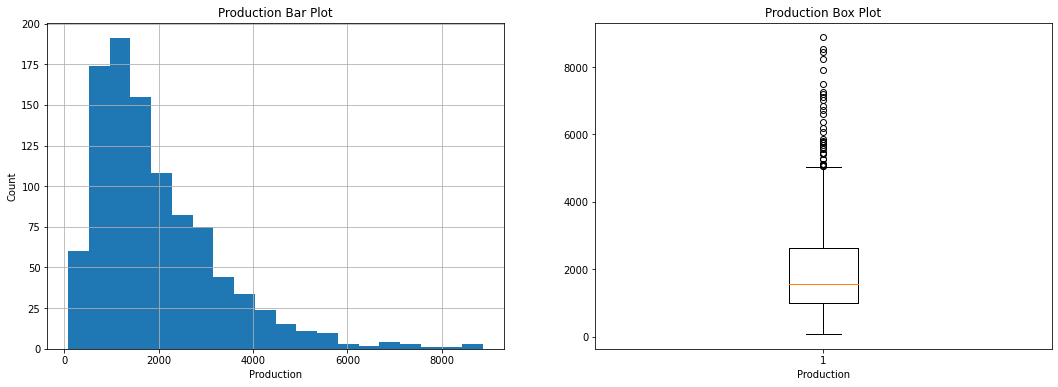

In [5]:
# target variable plot
print("Mean:", np.mean(df.production))
print("Median:", np.median(df.production))
print("IQR:", (np.percentile(df.production, 75, interpolation = 'midpoint') - np.percentile(df.production, 25, interpolation = 'midpoint')))

plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.hist(df.production, bins = 20)
plt.title('Production Bar Plot')
plt.xlabel('Production')
plt.ylabel('Count')
plt.grid()

plt.subplot(122)
plt.boxplot(df.production)
plt.title('Production Box Plot')
plt.xlabel('Production')

Our target variable is "production". Based on the graphs above, the data is right-skewed with many outliers to the far-right those points that are above 6000mmcf). The target variable has a mean of 1950 and a median of 1569.

Text(0.5, 1.0, 'Variables Correlations Heatmap')

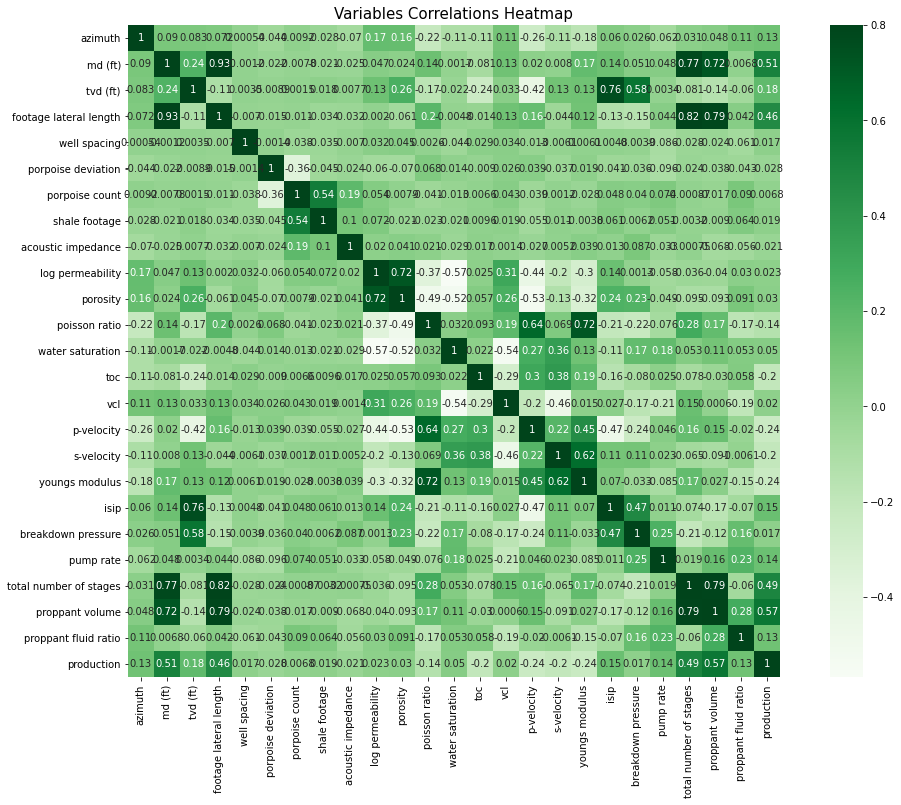

In [6]:
# correlation heatmap
corr = df.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr, vmax = .8, square = True, annot = True, cmap = "Greens")
plt.title('Variables Correlations Heatmap', fontsize=15)

To help us increase our efficiency in analyzing the data, we will use the correlation heatmap from above to have a glance through the relationships of different variables compared to our target. Because our goal is to build a model that can predict production, relationships between production and other variables will be our primary focus.

Variables that are highly correlated with the target variable:
md (ft)                   0.511440
footage lateral length    0.460939
total number of stages    0.493335
proppant volume           0.573235
Name: production, dtype: float64


C:\Users\theon\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.02, 'Strong Correlation Variables Pairplot')

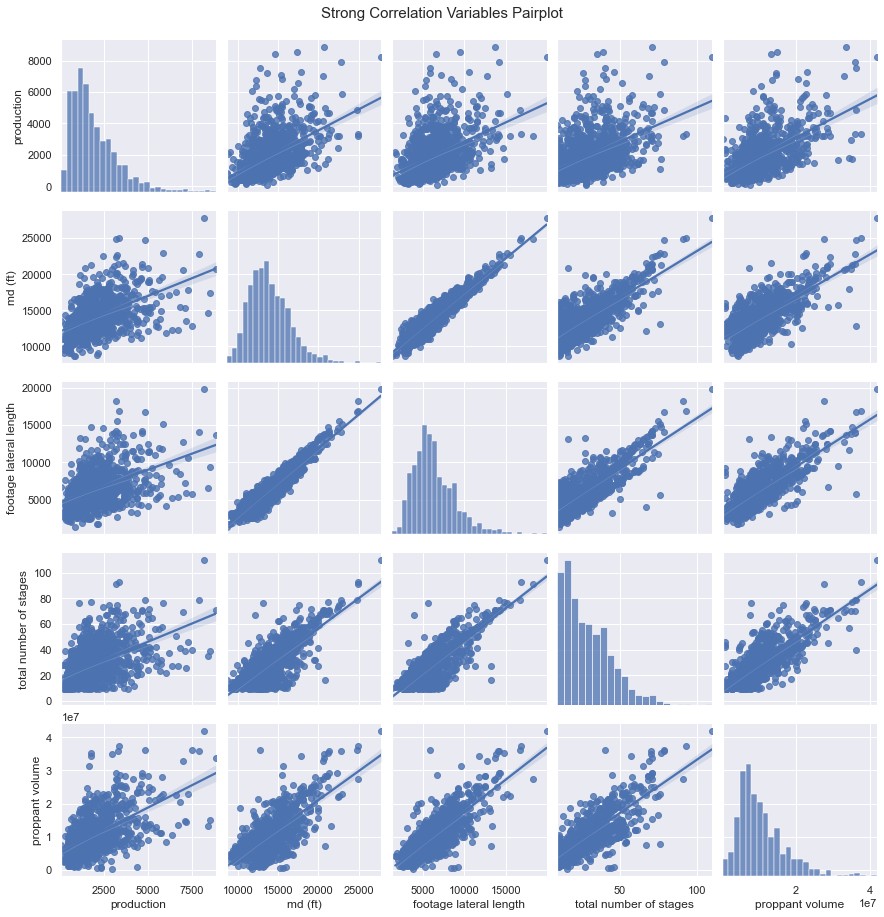

In [7]:
print('Variables that are highly correlated with the target variable:')
print(corr['production'][(corr['production'].sort_values(ascending = False) > 0.4) & (corr['production'].sort_values(ascending = False) != 1.0)])

sns.set()
sns.pairplot(df[['production', 'md (ft)', 'footage lateral length', 'total number of stages', 'proppant volume']], kind = 'reg', size = 2.5)
plt.suptitle('Strong Correlation Variables Pairplot', y = 1.02, fontsize = 15)

The four variables that has the highest correlation (over +/- 0.4) with "production" are: "production", "md (ft)", "footage lateral length", "total number of stages", and "proppant volume". We also produced the pair plots for those variables and see that all of them have a relatively strong and positive relationship with our target variable. Interestingly, All of these highly correlated data is slightly right-skewed, similar to the target variable as well.

Some with the weakest correlations (below +/- 0.1) are: "water saturation", "porpoise count", and "breakdown pressure". We can see that some of these variables are also the ones with the highest percentage of null values that we discovered above. 

With this information, we can later test to see if removing these variables would increase the prediction accuracy of the models.

C:\Users\theon\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\theon\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Production')

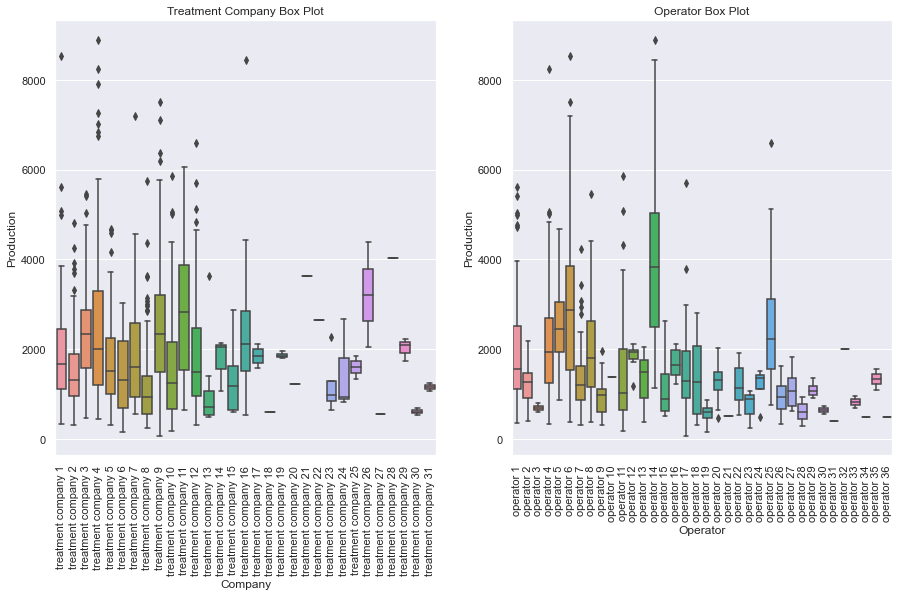

In [8]:
# target variable vs. categorical variables
plt.figure(figsize=(15, 8))
plt.subplot(121)
sns.boxplot(df['treatment company'], df.production)
plt.title('Treatment Company Box Plot')
plt.xlabel('Company')
plt.xticks(rotation = 90) 
plt.ylabel('Production')

plt.subplot(122)
sns.boxplot(df['operator'], df.production)
plt.title('Operator Box Plot')
plt.xlabel('Operator')
plt.xticks(rotation = 90) 
plt.ylabel('Production')

Because the correlation heatmap only looks at numerical variables, we would want to do some examination on the categorical variables as well. Here are the two box plots to compare relationships of "Company" and "Operator" with "production". Besides the insignificant differences among the categories and the unbalance representation of some categories for both plots, there is nothing too exciting for us to take away from these two plots.

## Data Transformation

C:\Users\theon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\theon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


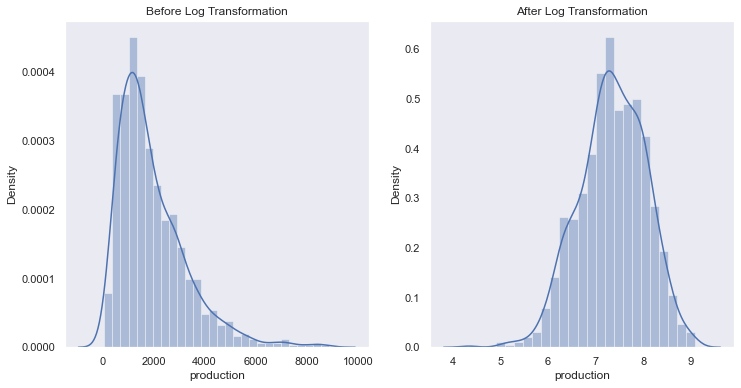

In [9]:
# target variable's log transformation
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(df.production)
plt.title('Before Log Transformation')
plt.grid()

df.production = np.log(df.production)

plt.subplot(122)
sns.distplot(df.production)
plt.title('After Log Transformation')
plt.grid()

When we discovered that our "production" data doesn't follow the bell curve, we can perform a log transformation to make it as normal as possible so that the statistical analysis results can be more valid. Above are the plots for before and after the log transformation being performed on "production".

In [10]:
# one-hot encoding
df = pd.get_dummies(df, columns = ['treatment company', 'operator'])
df.head()

,azimuth,md (ft),tvd (ft),date on production,footage lateral length,well spacing,porpoise deviation,porpoise count,shale footage,acoustic impedance,...,operator_operator 33,operator_operator 34,operator_operator 35,operator_operator 36,operator_operator 4,operator_operator 5,operator_operator 6,operator_operator 7,operator_operator 8,operator_operator 9
0,-32.279999,19148,6443.0,3/1/2018,11966.0,4368.46290,6.33,12,1093,30123.20,...,0,0,0,0,0,0,0,0,0,0
1,-19.799999,15150,7602.0,7/1/2014,6890.0,4714.99220,1.28,4,0,30951.61,...,0,0,0,0,0,0,0,0,0,0
2,-26.879999,14950,5907.0,8/1/2018,8793.0,798.92096,2.03,6,3254,28900.25,...,0,0,0,0,0,0,0,0,0,0
3,-49.099998,11098,6538.0,1/1/2012,4234.0,NaN,6.00,23,7470,32826.08,...,0,0,0,0,0,0,0,0,0,0
4,5.560000,10549,7024.0,1/1/2012,2972.0,2967.56300,11.87,9,3637,26740.05,...,0,0,0,0,0,0,0,0,0,0


To utilize the categorical features ("Company" and "Operator"), we would need to transform them into binary variables using one-hot encoding. This results in a new data shape of 93 columns.

## Model Building

In [11]:
# train & test split
X = df.drop(["production", "date on production", "water saturation", "breakdown pressure"], axis = 1)
y = df.production.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) # 80/20 split

We perform an 80/20 train and test datasets split. 

Before the splitting, we removed the "date on production" variable because it's a date data type. We also removed "water saturation" and "breakdown pressure" from the dataset because of their high null value percentages and because they don't have a strong correlation with the target variable.

In [12]:
# median imputation
X_train.fillna(X_train.median(), inplace = True)
X_test.fillna(X_test.median(), inplace = True)

C:\Users\theon\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


For simplicity, we perform median imputation to solve the null value issue on the rest of the features.

We will create 5 different regression machine learning models and compare their accuracies to pick the best performing model. The 5 models are linear regression, decision tree, support vector regression (SVR), Lasso regression, and random forest regression. 

Mean absolute error is the metric we will use for comparing these models. Once the best model is decided, we will tune the parameters of that model to make it a custom fit for this dataset.

### Linear Regression

In [13]:
lin_reg = LinearRegression().fit(X_train, y_train)

print('MAE Value:', mean_absolute_error(y_test, lin_reg.predict(X_test)))

MAE Value: 0.34467389908284474


### Decision Tree

In [14]:
decision_tree = DecisionTreeRegressor(random_state = 1).fit(X_train, y_train)

print('MAE Value:', round(mean_absolute_error(y_test, decision_tree.predict(X_test)),4))

MAE Value: 0.4583


### Support Vector Regression

In [15]:
svr = SVR().fit(X_train, y_train)

print('MAE Value:', round(mean_absolute_error(y_test, svr.predict(X_test)),4))

MAE Value: 0.5045


### Lasso Regression

In [16]:
lasso_reg = Lasso(alpha=0.1, random_state = 1).fit(X_train, y_train)

print('MAE Value:', round(mean_absolute_error(y_test, lasso_reg.predict(X_test)),4))

MAE Value: 0.4455


### Random Forest Regressor

In [17]:
random_reg = RandomForestRegressor(random_state = 1).fit(X_train, y_train)

print('MAE Value:', round(mean_absolute_error(y_test, random_reg.predict(X_test)),4))

MAE Value: 0.3098


From the five results above, we see that the **Random Forest Regressor** yield the lowest MAE value, hence it's the best model and will be used for fine-tuning.

### Hyperparameter Tuning

In [18]:
# GridsearchCV
parameters = {'n_estimators': [200, 400, 600, 800],
              'criterion': ['mse', 'mae'], 
              'max_features': ['auto','sqrt','log2']}
grid = GridSearchCV(random_reg, parameters, scoring = 'neg_mean_absolute_error', cv = 5).fit(X_train, y_train)

grid.best_estimator_

RandomForestRegressor(n_estimators=600, random_state=1)

In [19]:
print('MAE Value:', round(mean_absolute_error(y_test, grid.best_estimator_.predict(X_test)),4))

MAE Value: 0.3103


Even after tuning the model, the result does not differ much from the base model. In this case, we can consider using the base model to save us the computational resources for running the model.

### Feature Importance

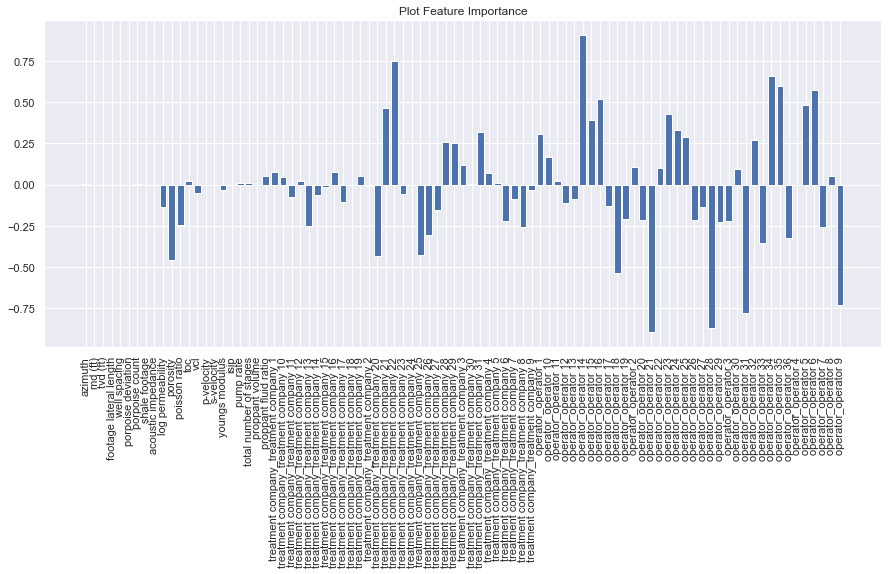

In [20]:
# get importance
importance = lin_reg.coef_

plt.figure(figsize=(15, 6))
plt.bar(X.columns, importance)
plt.title('Plot Feature Importance')
plt.xticks(rotation = 90)
plt.show()

A glance of the feature importance using the linear regression's coefficient, it's interesting to see that the different company and operation categories have big coefficients. 

Besides those two categorical variables, we also see that those variables that have low correlation have significant negative coefficients.

## Conclusion

To wrap up the assignment, we find that **Random Forest Regressor** (whether it's the base or the fine-tuned model) is the best regression model for predicting the 12 months cumulative gas production of nearby wells located in the United States. We can see that it performs really well with the test dataset, an unseen dataset, and returned the MAE value of 0.3.

I would want to thank you IHS Markit, especially Dr. Huy Nguyen, for this amazing opportunity and I am looking forward to hearing back from you!